1. Generar una red neuronal (sin librerias) que utilice el dataset iris con producto punto, errores, y de dos capas.

El objetivo es ajustar los pesos de la red de manera que pueda predecir correctamente la clase de nuevas instancias de datos.

In [3]:
import pandas as pd

# Lee el archivo CSV
data = pd.read_csv('D:\\preguntas\\1\iris.csv')

# Muestra los primeros registros del DataFrame
print(data.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
df = data
print(df)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

 toma una matriz de etiquetas Y y devuelve una matriz codificada,
 donde cada fila tiene un 1 en la columna correspondiente a la clase 
representada por la etiqueta y ceros en todas las demás columnas. 

In [19]:
def metiqueta_mcodficada(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

toma una matriz codificada Y,
busca la columna que tiene el valor 1 en cada fila y 
crea una nueva matriz que contiene las etiquetas correspondientes a esas columnas.

In [20]:
def array_de_etiquetas(Y):
    arr = np.zeros((len(Y), 1))

    for i in range(len(Y)):
        l = layer2[i]
        for j in range(len(l)):
            if(l[j] == 1):
                arr[i] = j+1
    return arr

-sigmoid(x): Esta función implementa la función de activación sigmoidal, también conocida como función logística
-derivada(x): Esta función calcula la derivada de la función sigmoidal en un punto x.
-normalize(X, axis=-1, order=2): Esta función realiza la normalización de un conjunto de datos X. 
    Toma como entrada X, que puede ser una matriz o un vector, y opcionalmente los argumentos axis y order. 

In [24]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
def derivada(x):
    return sigmoid(x)*(1 - sigmoid(x))
def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)


In [28]:
#Esta línea de código reemplaza los valores en la columna 'Species' del DataFrame df.
#Los valores 'Iris-setosa' se reemplazan por 0, 'Iris-virginica' se reemplaza por 1 y 'Iris-versicolor' se reemplaza por 2.
#El parámetro inplace=True indica que los cambios se deben realizar en el DataFrame df directamente.

df['Species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [0, 1, 2], inplace=True)
 
#Se crea una lista llamada columns que contiene los nombres de las columnas que se 
#utilizarán como características (variables independientes) en el conjunto de datos.
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
#Nuevo dataFrame
x = pd.DataFrame(df, columns=columns)
#Lo normalizamos
x = normalize(x.values)

columns = ['Species']
y = pd.DataFrame(df, columns=columns)
y = y.values
#La matriz de valores y se aplana en un arreglo unidimensional utilizando el método flatten()
y = y.flatten()
y = metiqueta_mcodficada(y)
#Esta función convierte las etiquetas categóricas en una representación codificada, 
#utilizando el enfoque de "one-hot encoding" (codificación one-hot). 
#El resultado es un arreglo que representa las etiquetas codificadas

C:\Users\Progra\AppData\Local\Temp\ipykernel_14560\7552734.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


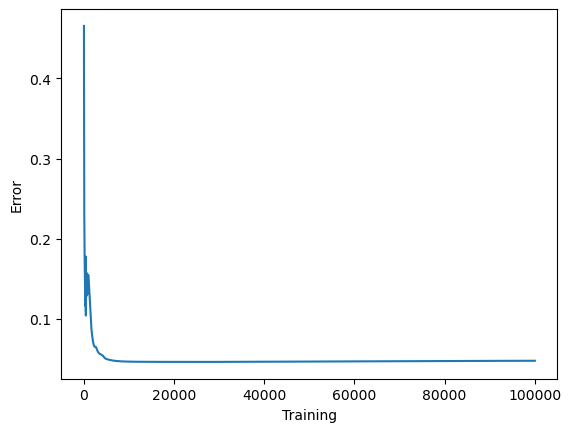

Precision 95.23%


In [29]:
#Esta línea divide los datos de entrada x y las etiquetas 
#y en conjuntos de entrenamiento (X_train, y_train) y conjunto de prueba (X_test, y_test),
#utilizando una proporción de prueba del 33%
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)
    
#Weights
#Se inicializan los pesos (w0) de la capa de entrada con valores aleatorios entre -1 y 1.
#Aquí se asume que hay 4 características en los datos de entrada y se establece
#que la capa de entrada tiene 5 neuronas.

w0 = 2*np.random.random((4, 5)) - 1 #for input   - 4 inputs, 3 outputs
w1 = 2*np.random.random((5, 3)) - 1 #for layer 1 - 5 inputs, 3 outputs

#learning rate
#Se define la tasa de aprendizaje (n) para el descenso de gradiente. 
#Este valor determina qué tan rápido se ajustarán los pesos durante el entrenamiento.
n = 0.1

#Errors - for graph later
errors = []

#Train
for i in range(100000):

    #Feed forward
    #Calcula las salidas de las capas oculta y de salida
    layer0 = X_train
    #La función de activación sigmoidal se aplica a las salidas de ambas capas.
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    #Back propagation using gradient descent
    layer2_error = y_train - layer2
    layer2_delta = layer2_error * derivada(layer2)
    
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * derivada(layer1)
    
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n
    
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100
#Se muestra un gráfico que representa el error en función del número de iteraciones durante el entrenamiento.
plt.plot(errors)
plt.xlabel('Training')
plt.ylabel('Error')
plt.show()
#Se imprime la precisión del modelo, que se calcula como 1 menos el error promedio,
#redondeado a 2 decimales y expresado como porcentaje.        
print("Precision " + str(round(accuracy,2)) + "%")

evalúa el rendimiento del modelo entrenado en el conjunto de prueba
y muestra la precisión del modelo en términos de porcentaje.

In [30]:
layer0 = X_test
layer1 = sigmoid(np.dot(layer0, w0))
layer2 = sigmoid(np.dot(layer1, w1))

layer2_error = y_test - layer2

error = np.mean(np.abs(layer2_error))
accuracy = (1 - error) * 100

print("Precision " + str(round(accuracy,2)) + "%")

Precision 91.82%


C:\Users\Progra\AppData\Local\Temp\ipykernel_14560\7552734.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))
